<a href="https://colab.research.google.com/github/marce3-2140/Unsupervised-ML-Models/blob/main/Online_Retail_Segmentation_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Online Retail**


## Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl
import matplotlib.cm as cm

# preprocesar
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# modelar
from sklearn.cluster import KMeans
# metricas
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

**Cargar Datos**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CodingDojo/Cargas/No_Supervised/OnlineRetail.csv",encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


##**I. Analisis Exploratorio de Datos**

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(536641, 8)

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Revisamos las columnas

In [ ]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641,536641,535187,536641.000000,536641,536641.000000,401604.000000,536641
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,NaN,United Kingdom
freq,1114,2301,2357,NaN,1114,NaN,NaN,490300
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15281.160818,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16784.000000,NaN


**Revisamos la columna de Facturas para separar las facturas canceladas**

In [ ]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

def comienza_con_c(valor):
  return valor.startswith('C') if isinstance(valor, str) else False

resultado = df[df['InvoiceNo'].apply(comienza_con_c)]
resultado.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,01-12-2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,01-12-2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,01-12-2010 12:38,4.25,17897.0,United Kingdom


> Nota: Los codigos de las facturas que empiezan por 'C' estan relacionados con las cantidades negativas, para hacer más fácil el modelado y gastar menos memoria reemplazaremos los datos que inicien con 'C' por 1 y los que no por 0

In [ ]:
def reemplazar_valor(valor):
  if str(valor).startswith('C'):
    return 1
  else:
    return 0

df['InvoiceNo'] = df['InvoiceNo'].apply(lambda x: reemplazar_valor(x))

In [ ]:
df['InvoiceNo'].value_counts()

0    527390
1      9251
Name: InvoiceNo, dtype: int64

**Revisamos las columnas con datos nulos**

In [ ]:
customer = df['CustomerID'].isnull()
df.loc[customer,:].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,0,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,0,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,0,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,0,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,0,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
1447,0,21790,VINTAGE SNAP CARDS,9,01-12-2010 14:32,1.66,NaN,United Kingdom
1448,0,21791,VINTAGE HEADS AND TAILS CARD GAME,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1449,0,21801,CHRISTMAS TREE DECORATION WITH BELL,10,01-12-2010 14:32,0.43,NaN,United Kingdom
1450,0,21802,CHRISTMAS TREE HEART DECORATION,9,01-12-2010 14:32,0.43,NaN,United Kingdom
1451,0,21803,CHRISTMAS TREE STAR DECORATION,11,01-12-2010 14:32,0.43,NaN,United Kingdom


In [ ]:
#Eiminamos columnas sobrantes
df = df.drop(columns=['CustomerID'])

In [ ]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
des = df['Description'].isnull()
print(des.sum())
df.loc[des,:].head(100)

1454


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,0,22139,NaN,56,01-12-2010 11:52,0.0,United Kingdom
1970,0,21134,NaN,1,01-12-2010 14:32,0.0,United Kingdom
1971,0,22145,NaN,1,01-12-2010 14:33,0.0,United Kingdom
1972,0,37509,NaN,1,01-12-2010 14:33,0.0,United Kingdom
1987,0,85226A,NaN,1,01-12-2010 14:34,0.0,United Kingdom
...,...,...,...,...,...,...,...
21785,0,37509,NaN,2,09-12-2010 15:57,0.0,United Kingdom
21786,0,62095B,NaN,2,09-12-2010 15:57,0.0,United Kingdom
21787,0,72814,NaN,2,09-12-2010 15:57,0.0,United Kingdom
21788,0,84802A,NaN,2,09-12-2010 15:57,0.0,United Kingdom


> Nota: En la anterior tabla observamos que cuando los datos están nulos en la columna Description estan en cero los datos de UnitPrice

In [ ]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
uni = df['UnitPrice'] == 1
print(uni.sum())
df.loc[uni,:].head(100)

143


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
10113,0,M,Manual,1,05-12-2010 16:41,1.0,United Kingdom
14514,1,AMAZONFEE,AMAZON FEE,-1,07-12-2010 12:41,1.0,United Kingdom
37317,0,M,Manual,2,17-12-2010 17:24,1.0,United Kingdom
115319,0,M,Manual,12,09-03-2011 13:56,1.0,United Kingdom
130294,0,POST,POSTAGE,1,23-03-2011 10:55,1.0,Portugal
...,...,...,...,...,...,...,...
447027,0,22616,PACK OF 12 LONDON TISSUES,138,07-11-2011 17:42,1.0,United Kingdom
455636,0,90210D,PURPLE ACRYLIC FACETED BANGLE,10,10-11-2011 13:44,1.0,United Kingdom
467725,0,23551,PACK OF 12 PAISLEY PARK TISSUES,96,14-11-2011 17:55,1.0,United Kingdom
467735,0,23510,MINI PLAYING CARDS GYMKHANA,96,14-11-2011 17:55,1.0,United Kingdom


In [ ]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
cus = df['Description'] == 'POSTAGE'
print(cus.sum())
df.loc[cus,:].head(20)

1252


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
45,0,POST,POSTAGE,3,01-12-2010 08:45,18.0,France
386,0,POST,POSTAGE,1,01-12-2010 11:27,15.0,Netherlands
1123,0,POST,POSTAGE,1,01-12-2010 13:04,18.0,Germany
5073,0,POST,POSTAGE,1,02-12-2010 18:27,18.0,Germany
5258,0,POST,POSTAGE,1,03-12-2010 09:51,18.0,France
5325,0,POST,POSTAGE,2,03-12-2010 10:36,40.0,Switzerland
5369,0,POST,POSTAGE,3,03-12-2010 10:44,18.0,Germany
6602,0,POST,POSTAGE,1,03-12-2010 12:57,18.0,Germany
6676,0,POST,POSTAGE,2,03-12-2010 13:59,18.0,France
6973,0,POST,POSTAGE,1,03-12-2010 14:30,18.0,Germany


In [ ]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
des = df['Description'] == 'Manual'
print(des.sum())
df.loc[des,:].head(20)

567


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
2239,0,M,Manual,1,01-12-2010 15:35,1.25,United Kingdom
2250,0,M,Manual,1,01-12-2010 15:35,18.95,United Kingdom
5684,0,M,Manual,1,03-12-2010 11:28,2.55,United Kingdom
6798,0,M,Manual,2,03-12-2010 14:26,0.85,United Kingdom
7976,0,M,Manual,12,05-12-2010 11:59,0.42,United Kingdom
8530,0,M,Manual,36,05-12-2010 12:43,0.85,United Kingdom
8587,0,M,Manual,1,05-12-2010 12:53,0.42,United Kingdom
8588,0,M,Manual,1,05-12-2010 12:53,0.85,United Kingdom
9326,0,M,Manual,1,05-12-2010 14:06,0.65,United Kingdom
9575,0,M,Manual,4,05-12-2010 15:12,0.85,United Kingdom


> Nota: la columna Description está relacionada directamente con la columna StockCode, colo la columna StockCode no tiene datos faltantes rellenaremos los faltantes de Description con esta relacion

In [ ]:
# Calcular la moda de 'Description' para cada valor único en 'StockCode'
def calculate_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

moda_por_columna2 = df.groupby('StockCode')['Description'].transform(calculate_mode)

# Llenar los valores faltantes en 'Description' con la moda correspondiente por 'StockCode'
df['Description'].fillna(moda_por_columna2, inplace=True)

<ipython-input-19-84d64ef1bd71>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  moda_por_columna2 = df.groupby('StockCode')['Description'].transform(calculate_mode)
<ipython-input-19-84d64ef1bd71>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  moda_por_columna2 = df.groupby('StockCode')['Description'].transform(calculate_mode)
<ipython-input-19-84d64ef1bd71>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  moda_por_columna2 = df.groupby('StockCode')['Description'].transform(calculate_mode)
<ipython-input-19-84d64ef1bd71>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify

In [ ]:
#Verificamos los resultados
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
des = df['Description'].isnull()
print(des.sum())
df.loc[des,:].head()

112


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
1970,0,21134,NaN,1,01-12-2010 14:32,0.0,United Kingdom
1987,0,85226A,NaN,1,01-12-2010 14:34,0.0,United Kingdom
1988,0,85044,NaN,1,01-12-2010 14:34,0.0,United Kingdom
2024,0,20950,NaN,1,01-12-2010 14:34,0.0,United Kingdom
2026,0,84670,NaN,23,01-12-2010 14:35,0.0,United Kingdom


> Nota: de la aterior imputacion quedaron 112 valores perdidos porque son unicos y no tienen con que rellenarse, eliminaremos estas filas

In [ ]:
df = df.dropna()

In [ ]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
des = df['Description'] == 'NaN'
print(des.sum())
df.loc[des,:].head(100)

0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country


In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
OOPS ! adjustment                        1
found box                                1
thrown away-can't sell.                  1
thrown away-can't sell                   1
Amazon sold sets                         1
Name: Description, Length: 4223, dtype: int64

> Nota: Algunos datos en la columna Description tienen ocurrencias de 1 y otros ocurrencias de mas de 1000, revisaremos esa relación.

In [ ]:
#Verificamos los resultados
#Filtramos los datos de Describe conociendo cuantas ocurrencias hay por cada valor
des = df['Description'] == 'RECIPE BOX WITH METAL HEART'
print(des.sum())
df.loc[des,:].head()

10


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
19,0,21777,RECIPE BOX WITH METAL HEART,4,01-12-2010 08:34,7.95,United Kingdom
2140,0,21777,RECIPE BOX WITH METAL HEART,2,01-12-2010 15:08,7.95,United Kingdom
2399,0,21777,RECIPE BOX WITH METAL HEART,1,01-12-2010 16:49,7.95,United Kingdom
2406,0,21777,RECIPE BOX WITH METAL HEART,-10,01-12-2010 16:50,0.00,United Kingdom
2587,0,21777,RECIPE BOX WITH METAL HEART,2,01-12-2010 17:06,7.95,United Kingdom


> Nota: los datos en la columna Description son categoricos y son 3895 segun la informacion con .description, asi que revisaremos que datos solo estan repetidos una vez

In [ ]:
#Identificamos ocurrencias
des = df['Description'] == 'Amazon sold sets'
print(des.sum())
df.loc[des,:].head()

1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
114534,0,85175,Amazon sold sets,-210,08-03-2011 17:27,0.0,United Kingdom


In [ ]:
# Calcular el recuento de ocurrencias de cada valor en 'columna1'
ocurrencias = df['Description'].value_counts()

# Filtrar los valores que se repiten solo una vez
valores_filtrados = ocurrencias[ocurrencias > 1000].index

# Crear un nuevo DataFrame que contenga solo las filas con valores únicos
df_filtrado = df[df['Description'].isin(valores_filtrados)]
count_mayores_1000 = df_filtrado['Description'].count()
count_mayores_1000

47466

In [ ]:
# Calcular el recuento de ocurrencias de cada valor en 'columna1'
ocurrencias = df['Description'].value_counts()

# Filtrar los valores que se repiten solo una vez
valores_100 = ocurrencias[ocurrencias > 100].index

# Crear un nuevo DataFrame que contenga solo las filas con valores únicos
df_filtrado = df[df['Description'].isin(valores_100)]
count_mayores_100 = df_filtrado['Description'].count()
count_mayores_100

457629

In [ ]:
# Calcular el recuento de ocurrencias de cada valor en 'columna1'
ocurrencias = df['Description'].value_counts()

# Filtrar los valores que se repiten solo una vez
valores_filtrados = ocurrencias[ocurrencias <= 100].index

# Crear un nuevo DataFrame que contenga solo las filas con valores únicos
df_filtrado = df[df['Description'].isin(valores_filtrados)]
count_menores_100 = df_filtrado['Description'].count()
count_menores_100

78900

In [ ]:
# Calcular el recuento de ocurrencias de cada valor en 'columna1'
ocurrencias = df['Description'].value_counts()

# Filtrar los valores que se repiten solo una vez
valores_filtrados = ocurrencias[ocurrencias < 1000].index

# Crear un nuevo DataFrame que contenga solo las filas con valores únicos
df_filtrado_50 = df[df['Description'].isin(valores_filtrados)]
count_menores_50 = df_filtrado_50['Description'].count()
count_menores_50

489063

In [ ]:
unicos_description = df['Description'].nunique()
print(f'Numero de ocurrencias unicas en Description: {unicos_description}')
print(f'Ocurrencias en Description mayores de 1000: {count_mayores_100/len(df)*100} %')
print(f'Ocurrencias en Description menores o iguales a 100: {count_menores_100/len(df)*100} %')
print(f'Ocurrencias en Description menores de 50: {count_menores_50/len(df)*100} %')

Numero de ocurrencias unicas en Description: 4223
Ocurrencias en Description mayores de 1000: 85.29436433072584 %
Ocurrencias en Description menores o iguales a 100: 14.705635669274168 %
Ocurrencias en Description menores de 50: 91.15313431333628 %


> Nota: Las ocurrencias en Description menores a 100 son el 14 del total de los datos, en comparacion con el 85% de ocurrencias mayores a 100, la anterior relacion se busco con el proposito de eliminar ocurrencias poco relevantes para el estudio para disminuir el consumo de memoria durante la aplicacion de modelos, eliminaremos las ocurrencias menores a 50 que son el 6% de los datos

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
OOPS ! adjustment                        1
found box                                1
thrown away-can't sell.                  1
thrown away-can't sell                   1
Amazon sold sets                         1
Name: Description, Length: 4223, dtype: int64

In [ ]:
#Eliminamos las ocurrencias menores a 50 veces
# Calcular el recuento de ocurrencias de cada valor en 'columna1'
ocurrencias = df['Description'].value_counts()

# Crear una lista de valores que se repiten 50 o más veces
valores_a_mantener = ocurrencias[ocurrencias > 1000].index

# Filtrar el DataFrame original para incluir solo filas con valores en la lista
df = df[df['Description'].isin(valores_a_mantener)]

In [ ]:
# Verificamos
ocurrencias = df['Description'].value_counts()

# Filtrar los valores que se repiten solo una vez
valores_filtrados = ocurrencias[ocurrencias < 1000 ].index

# Crear un nuevo DataFrame que contenga solo las filas con valores únicos
df_filtrado = df[df['Description'].isin(valores_filtrados)]
count_menores_1000 = df_filtrado['Description'].count()
count_menores_1000

0

In [ ]:
#Revisamos con que datos nos quedamos
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
count,47466.000000,47466,47466,47466.000000,47466,47466.000000,47466
unique,NaN,38,37,NaN,13470,NaN,36
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,United Kingdom
freq,NaN,2290,2357,NaN,35,NaN,42491
mean,0.024839,NaN,NaN,12.208402,NaN,4.279392,NaN
std,0.155635,NaN,NaN,44.394709,NaN,53.383497,NaN
min,0.000000,NaN,NaN,-1930.000000,NaN,0.000000,NaN
25%,0.000000,NaN,NaN,2.000000,NaN,1.650000,NaN
50%,0.000000,NaN,NaN,6.000000,NaN,2.550000,NaN
75%,0.000000,NaN,NaN,10.000000,NaN,4.130000,NaN


> Nota: Ya no necesitamos los valores de la columna StockCode, por lo que la eliminamos, ademas verificamos que los valores unicos de la columna Description pasaron de 4223 a 2189.

In [ ]:
df = df.drop(columns=['StockCode'])

In [ ]:
#Convertimos a dato de tiempo la columna con fechas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

> Nota: encontramos 1148 datos de valor cero en la columna De precios por unidad

In [ ]:
#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
uni = df['UnitPrice'] == 0
print(uni.sum())
df.loc[uni,:].head()

53


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
14340,0,GREEN REGENCY TEACUP AND SAUCER,1,2010-07-12 11:48:00,0.0,United Kingdom
14389,0,LUNCH BAG WOODLAND,1,2010-07-12 11:48:00,0.0,United Kingdom
40089,0,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,EIRE
41072,0,SET/20 RED RETROSPOT PAPER NAPKINS,2,2010-12-21 15:40:00,0.0,United Kingdom
41446,0,RED RETROSPOT CHARLOTTE BAG,2,2010-12-22 14:41:00,0.0,United Kingdom


> Nota: como ya eliminamos las ocurrencias menores de los productos, estos productos con valor cero tienen ocurrencias mayores a 50 veces, por lo que los rellenaremos con la mediana de la columna.

In [ ]:
#Rellenamos los valores cero
# Calcular la mediana de 'columna1' (ignorando los valores cero)
mediana_UnitPrice = df['UnitPrice'][df['UnitPrice'] != 0].median()
df['UnitPrice'].replace(0, mediana_UnitPrice, inplace=True)

In [ ]:
#Verificamos que se hallan rellenado correctamente
uni = df['UnitPrice'] == 0
print(uni.sum())
df.loc[uni,:].head()

0


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country


In [ ]:
#Revision de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47466 entries, 0 to 541899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    47466 non-null  int64         
 1   Description  47466 non-null  object        
 2   Quantity     47466 non-null  int64         
 3   InvoiceDate  47466 non-null  datetime64[ns]
 4   UnitPrice    47466 non-null  float64       
 5   Country      47466 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.5+ MB


## **II. Visualizacion de Datos**

<ipython-input-42-5d16b4d750a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


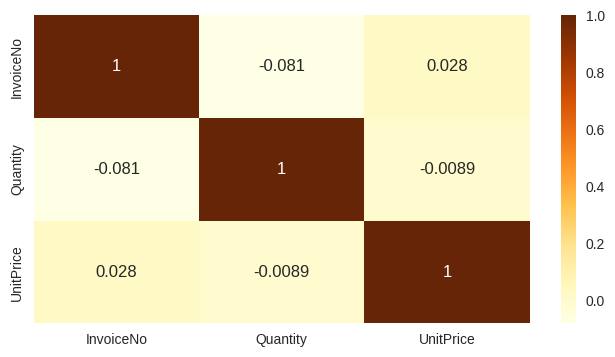

In [ ]:
#Identificamos correlaciones entree las columnas
corr = df.corr()
plt.figure(figsize=(8,4)) #Grafico Size
sns.heatmap(corr, cmap='YlOrBr', annot=True); #Creamos el mapa de calor
plt.show();

In [ ]:
df.columns

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

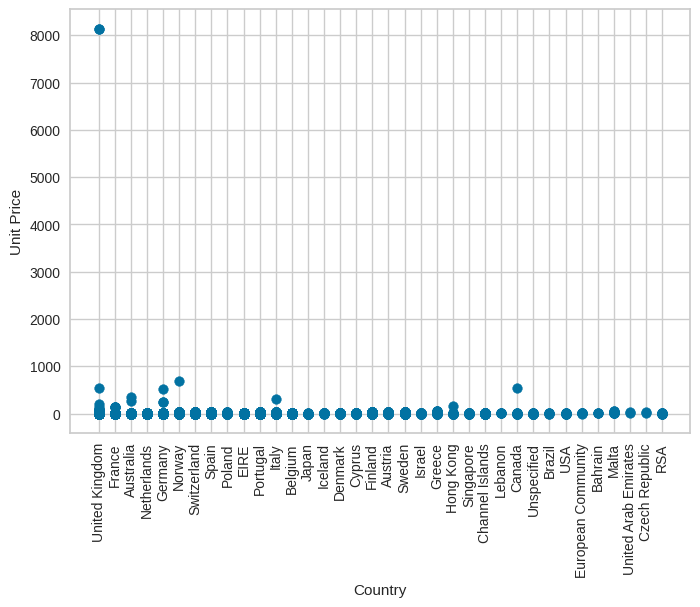

In [ ]:
# Visualize data
plt.scatter(df['Country'], df['UnitPrice'])
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=90);

> Nota: La grafica nos muestra un Outlier en la variable de precio unitario mayor a 35.000

In [ ]:
unit_max = df['UnitPrice'] > 6000
df.loc[unit_max,:].head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
173277,1,POSTAGE,-1,2011-03-05 12:51:00,8142.75,United Kingdom
173382,0,POSTAGE,1,2011-03-05 13:46:00,8142.75,United Kingdom


> Nota: Solo hay un valor que corresponde a este dato y se puede clasificar como un outlier

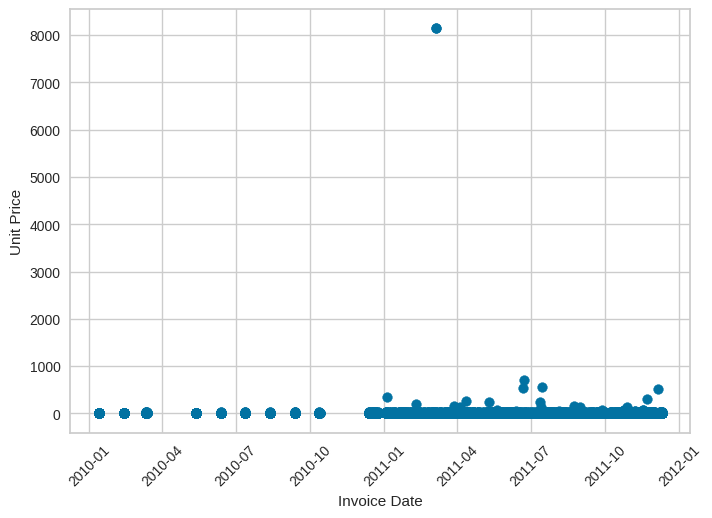

In [ ]:
plt.scatter(df['InvoiceDate'], df['UnitPrice'])
plt.xlabel('Invoice Date')
plt.ylabel('Unit Price')
plt.xticks(rotation=45);

> Nota: La grafica nos muestra que los valores mayores a 6000 si son outliers por lo que revisaremos esos valores

In [ ]:
unit_max = df['UnitPrice'] > 6000
df.loc[unit_max,:].head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
173277,1,POSTAGE,-1,2011-03-05 12:51:00,8142.75,United Kingdom
173382,0,POSTAGE,1,2011-03-05 13:46:00,8142.75,United Kingdom


> Nota: Encontramos que son solo 3 valores los que estan por encima de este precio y en comparacion con la cantidad de datos del dataset se pueden considerar outliers por lo que vamos a eliminarlos.

In [ ]:
df = df.drop([173277, 173382])

In [ ]:
#Verificamos que se haya borrado
unit_max = df['UnitPrice'] > 6000
df.loc[unit_max,:].head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country


In [ ]:
#Por cuestiones practicas se supera la memoria RAM por lo que eliminaremos
#la columna Description solo para poder hacer la implementacion de los modelos
#df = df.drop(columns='Description')

## **III. Preprocesado**

In [ ]:
# seleccionamos columnas
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
#Instanciar transformadores
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
#Instanciar pipelines
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
#Instanciar ColumnTransformer
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)

category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e24f467be20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e24f46786d0>)])

In [ ]:
# entrenamos el transformador
#Transformador de datos
# fit on train
preprocessor.fit(df)

# transform train and test
df_processed = preprocessor.transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_processed = pd.DataFrame(df_processed)
df_processed

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.159532,-0.139856,-0.181210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.159532,0.445794,-0.293382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.159532,-0.139856,0.040524,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.159532,0.265594,-0.024692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.159532,-0.004706,-0.024692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47459,-0.159532,0.085394,-0.293382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47460,-0.159532,-0.094806,-0.024692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47461,-0.159532,-0.184906,-0.024692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47462,-0.159532,-0.184906,-0.024692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

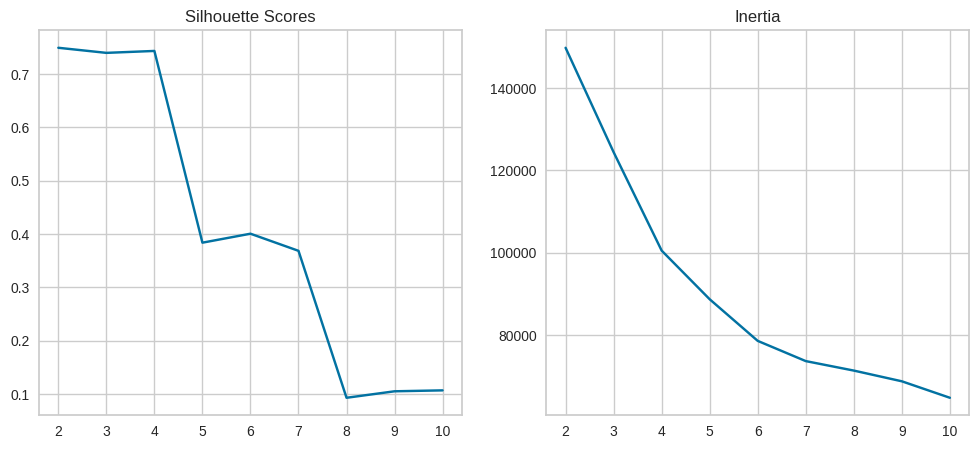

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_processed)
  sils.append(silhouette_score(df_processed, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

> Nota: El trazado de Silueta nos da el mejor cluster en 2 y el trazado de inercia nos muestra un codo en 3 y 4 clusters.

### **Group the dataframe by 2 cluster**

In [ ]:
'''Ajustemos un nuevo modelo con 2 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_processed)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,cluster
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,0
9,0,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,United Kingdom,0
21,0,JAM MAKING SET WITH JARS,6,2010-01-12 08:34:00,4.25,United Kingdom,0
27,0,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,France,0
28,0,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,France,0


**Los valores medios nos dan la idea del cluster en su conjunto**

In [ ]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

<ipython-input-59-9b62e6222b10>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups = df.groupby('cluster', as_index=False).mean()


,cluster,InvoiceNo,Quantity,UnitPrice
0,0,0.000000,12.785225,3.819072
1,1,0.995773,-10.337278,8.643128


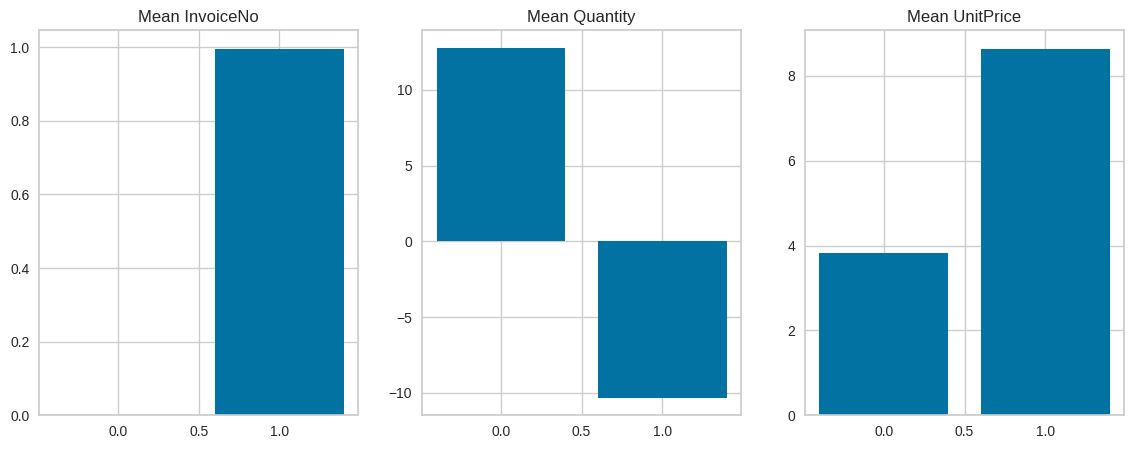

In [ ]:
# Visualize means
fig, axes = plt.subplots(1,3, figsize = (14, 5))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Analisis de resultados**

* El cluster 0, no tiene cancelaciones, tiene cantidades entre 0 y 14, y tiene una relacion del precio alrededor de 4
* El cluster 1, presenta gran cantidad de cancelaciones, no se representan ventas significativas y el precio del producto es mas alto que el anterior esta en alrededor de 8.

* El cluster 1, son menos cantidad de productos por item alrededor de 5 y de precio mucho más alto alrededor de 400.

En esta agrupacion es mejor el cluster 0

In [ ]:
#Agrupamos los clientes segun las caracteristicas
nuevo_df = df.loc[df['cluster']==0]
nuevo_df.head(10)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,cluster
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,0
9,0,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,United Kingdom,0
21,0,JAM MAKING SET WITH JARS,6,2010-01-12 08:34:00,4.25,United Kingdom,0
27,0,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,France,0
28,0,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,France,0
45,0,POSTAGE,3,2010-01-12 08:45:00,18.00,France,0
46,0,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-01-12 09:00:00,2.55,United Kingdom,0
49,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,United Kingdom,0
59,0,WOODEN PICTURE FRAME WHITE FINISH,6,2010-01-12 09:02:00,2.10,United Kingdom,0
66,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,United Kingdom,0


In [ ]:
#Agrupamos los clientes segun las caracteristicas
nuevo_df = df.loc[df['cluster']==0]
nuevo_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'ASSORTED COLOUR BIRD ORNAMENT', 'JAM MAKING SET WITH JARS',
       'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN',
       'POSTAGE', "PAPER CHAIN KIT 50'S CHRISTMAS ",
       'WOODEN PICTURE FRAME WHITE FINISH', 'JUMBO BAG PINK POLKADOT',
       'LUNCH BAG RED RETROSPOT', 'PACK OF 72 RETROSPOT CAKE CASES',
       'JUMBO STORAGE BAG SUKI', 'JAM MAKING SET PRINTED',
       'JUMBO SHOPPER VINTAGE RED PAISLEY',
       'NATURAL SLATE HEART CHALKBOARD ', 'HEART OF WICKER SMALL',
       'JUMBO BAG RED RETROSPOT', 'SET/20 RED RETROSPOT PAPER NAPKINS ',
       'LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG WOODLAND',
       'LUNCH BAG PINK POLKADOT', 'LUNCH BAG CARS BLUE',
       'LUNCH BAG  BLACK SKULL.', 'VICTORIAN GLASS HANGING T-LIGHT',
       'REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER ',
       'GREEN REGENCY TEACUP AND SAUCER',
       'RECIPE BOX PANTRY YELLOW DESIGN', 'RED RETROSPOT CHARLOTTE BAG',
       'PARTY 

In [ ]:
#Agrupamos los clientes segun las caracteristicas
nuevo_df = df.loc[df['cluster']==0]
nuevo_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Switzerland', 'Spain', 'Poland', 'EIRE', 'Portugal',
       'Italy', 'Belgium', 'Japan', 'Iceland', 'Denmark', 'Cyprus',
       'Finland', 'Austria', 'Sweden', 'Israel', 'Greece', 'Hong Kong',
       'Singapore', 'Channel Islands', 'Lebanon', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta',
       'United Arab Emirates', 'Czech Republic', 'RSA'], dtype=object)

In [ ]:
df['cluster'].value_counts()

0    46224
2     1176
3       55
1        9
Name: cluster, dtype: int64

In [ ]:
#Agrupamos los clientes segun las caracteristicas
nuevo_df = df.loc[df['cluster']==1]
nuevo_df.head(10)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,cluster
939,1,JAM MAKING SET WITH JARS,-6,2010-01-12 12:38:00,4.25,United Kingdom,1
4882,1,VICTORIAN GLASS HANGING T-LIGHT,-1,2010-02-12 17:05:00,1.25,United Kingdom,1
12402,1,REGENCY CAKESTAND 3 TIER,-1,2010-06-12 12:55:00,12.75,United Kingdom,1
13052,1,POSTAGE,-1,2010-06-12 15:09:00,4.41,United Kingdom,1
13053,1,PAPER CHAIN KIT 50'S CHRISTMAS,-6,2010-06-12 15:09:00,2.95,United Kingdom,1
13055,1,JAM MAKING SET WITH JARS,-1,2010-06-12 15:12:00,4.25,United Kingdom,1
14334,1,ALARM CLOCK BAKELIKE GREEN,-2,2010-07-12 11:47:00,3.75,United Kingdom,1
14524,1,JUMBO BAG RED RETROSPOT,-1,2010-07-12 12:45:00,1.65,United Kingdom,1
14529,1,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-07-12 12:45:00,2.55,United Kingdom,1
14535,1,REGENCY CAKESTAND 3 TIER,-2,2010-07-12 12:45:00,10.95,United Kingdom,1


### **Group the dataframe by 3 cluster**

In [ ]:
'''Ajustemos un nuevo modelo con 3 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_processed)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,cluster
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,0
9,0,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,United Kingdom,0
21,0,JAM MAKING SET WITH JARS,6,2010-01-12 08:34:00,4.25,United Kingdom,0
27,0,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,France,0
28,0,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,France,0


**Los valores medios nos dan la idea del cluster en su conjunto**

In [ ]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

<ipython-input-66-9b62e6222b10>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups = df.groupby('cluster', as_index=False).mean()


,cluster,InvoiceNo,Quantity,UnitPrice
0,0,0.000000,12.785734,3.808865
1,1,1.000000,-10.401361,5.946063
2,2,0.222222,0.555556,412.472222


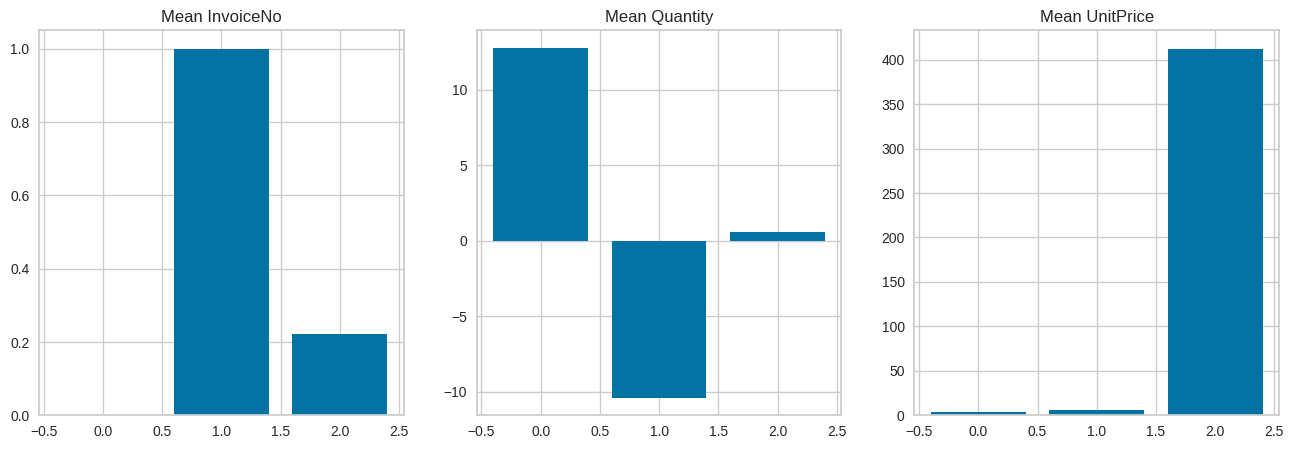

In [ ]:
# Visualize means
fig, axes = plt.subplots(1,3, figsize = (16, 5))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

> Nota:

* El cluster 0, no tiene cancelaciones, la cantidad media esta en 14 productos por factura, pero la medio del precio es muy baja.
* El cluster 1 tiene cancelaciones, no tiene gran cantidad de productos por factura, y el precio del producto esta ligeramente mas alto que el del cluster 0 pero es muy bajo comparado al cluster 2.
* El cluster 3 tiene cancelaciones pero no en gran cantidad como el cluster 0, tiene un poco mas de cantidad de producto por factura en relacion al cluster 1 pero es alrededor de 1 o 2 productos, pero tiene el precio unitario mas alto.

* En conclusion el mejor clusters en esta agrupacion son el 2.

### **Group the dataframe by 4 cluster**

In [ ]:
'''Ajustemos un nuevo modelo con 4 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_processed)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,cluster
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,0
9,0,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,United Kingdom,0
21,0,JAM MAKING SET WITH JARS,6,2010-01-12 08:34:00,4.25,United Kingdom,0
27,0,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,France,0
28,0,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,France,0


**Los valores medios nos dan la idea del cluster en su conjunto**

In [ ]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

<ipython-input-69-9b62e6222b10>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_groups = df.groupby('cluster', as_index=False).mean()


,cluster,InvoiceNo,Quantity,UnitPrice
0,0,0.000000,11.685466,3.810806
1,1,0.222222,0.555556,412.472222
2,2,1.000000,-10.401361,5.946063
3,3,0.000000,937.490909,2.177636


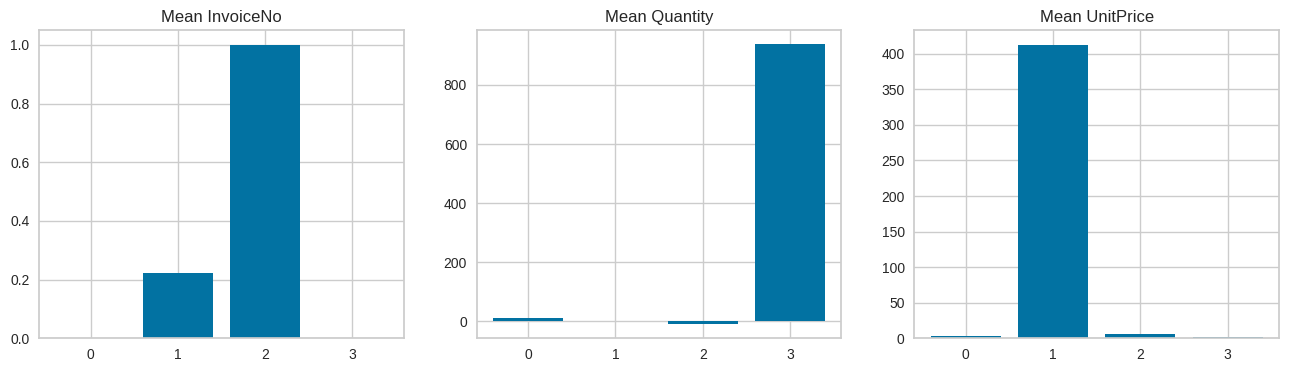

In [ ]:
# Visualize means
fig, axes = plt.subplots(1,3, figsize = (16, 4))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Analisis de resultados**

* El cluster 0 no tiene cancelaciones, tiene poca cantidad de ventas y el precio del producto por unidad es muy bajo.
* El cluster 1 tiene devoluciones significativas pero mucho menores al cluster 2, tiene muy poca ventas y los precios de los productos son bastantes altos.
* El cluster 2 tiene las mayores cancelaciones, pocas ventas de producto pero los precios por unidad de los productos son bastantes altos.
* El cluster 3 no tiene cancelaciones, tiene grandes cantidades de ventas de los productos, y el precio del producto es bajo.